In [731]:
#Importing required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

-----
### Data Collection:
 -----

In [732]:
#Loading Dataset as dataframe

data=pd.read_csv(r"rpcd.csv")

In [733]:
#Displaying the first 10 rows

data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


------
### Exploratory Data Analysis and Data Preprocessing:
------

In [734]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [735]:
#Columns in our dataset 

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [736]:
#Getting information about our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [737]:
#Knowing the datatypes of the columns

data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [738]:
#Describe function for the summary or stats of the data 

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [739]:
data['target'] = data.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [740]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [741]:
#Replacing Null values with the Mean or Median of the column

data['ca'].fillna(data['ca'].mean(), inplace = True)
data['thal'].fillna(data['thal'].mean(), inplace = True)

In [742]:
#checking for the null values 

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [743]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [744]:
#Describe function for the summary or stats of the data 

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9e6f84850>,
      dtype=object)

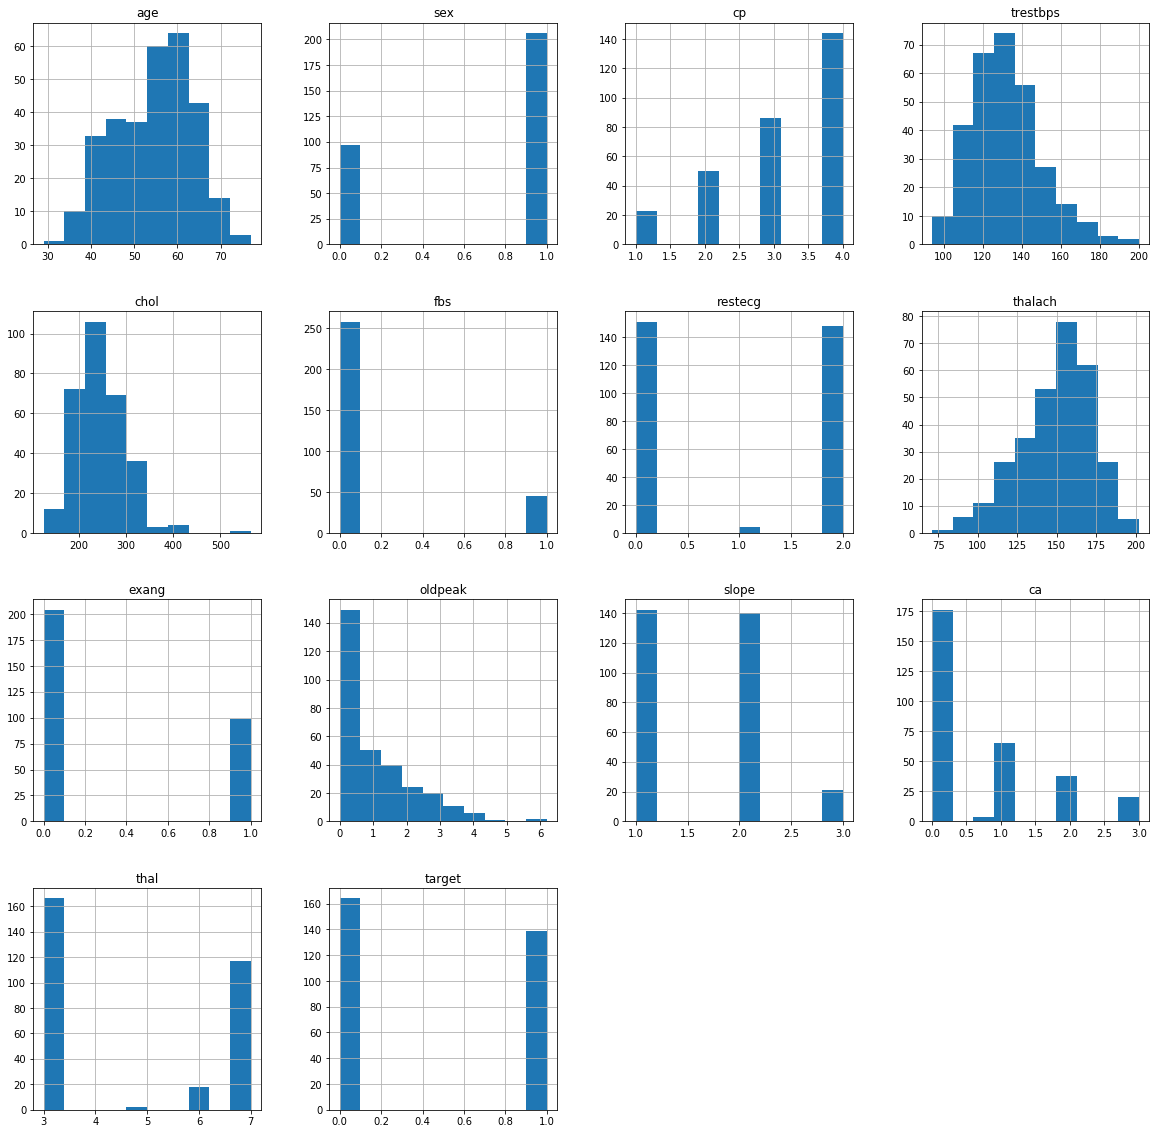

In [745]:
#analysing the distribution of the data in respective columns

hi= data.hist(figsize = (20,20))
hi

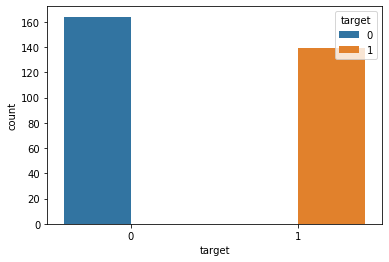

In [746]:
#Count of the outcomes

sns.countplot(data['target'],data=data,hue=data["target"])

In [747]:
#Count of both the outcomes

data['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

-------
### Correlation and HeatMap:
------

In [748]:
#Finding Correlation between the columns 

data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.127368,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.379300,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232332,0.264895,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.133534,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.014190,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,0.070658,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.024449,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.278530,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.328291,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.340549,0.424510


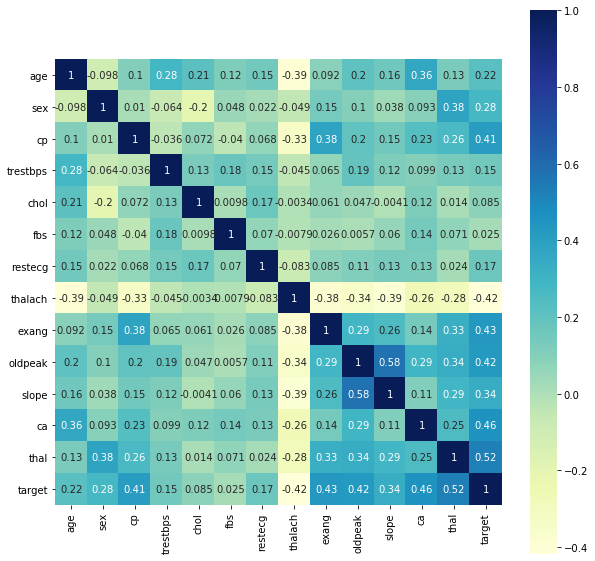

In [749]:
#HeatMap for better understanding of correraltion

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,square=True,cmap="YlGnBu")

In [750]:
#Correlaton of Independent variables with Dependent variable

u=data.corrwith(data['target'])
s=u.to_frame('corrvalue')
s.sort_values(by='corrvalue',ascending=False)

,corrvalue
target,1.000000
thal,0.523928
ca,0.457598
exang,0.431894
oldpeak,0.424510
cp,0.414446
slope,0.339213
sex,0.276816
age,0.223120
restecg,0.169202


----
### Model Training and Testing for 14 attributes:
-----

In [751]:
X = data.iloc[:, :-1].values # Independent Variables
y = data.iloc[:, 13].values   # Dependent Variable

In [752]:
# Splitting the dataset into Training Set and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [753]:
X_train.shape

(212, 13)

In [754]:
X_test.shape

(91, 13)

In [755]:
y_train.shape

(212,)

In [756]:
y_test.shape

(91,)

In [757]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Logistic Regression:

In [758]:
#LogisticRegression 

cval=[0.01,0.1,1,10,100]
Caccuracy=[]
from sklearn.linear_model import LogisticRegression
for c in cval:
    clf=LogisticRegression(C=c)
    clf.fit(X_train,y_train)
    
    #predicting Outcome
    y_pred=clf.predict(X_test) 

    #Calculating the score or accuracy of our model
    score_=clf.score(X_test,y_test)*100
    Caccuracy.append(score_)
    print("Accuracy: ","{:.2f}".format(score_),"%")
    
print("    ")
print("Best Accuracy: ","{:.2f}".format(max(Caccuracy)),"%")
best=Caccuracy.index(max(Caccuracy))

#Cvalue which gives the best acccuracy is:

bestC=cval[best]
print("Value of C for Best Accuracy: ",bestC)

Accuracy:  82.42 %
Accuracy:  82.42 %
Accuracy:  81.32 %
Accuracy:  82.42 %
Accuracy:  82.42 %
    
Best Accuracy:  82.42 %
Value of C for Best Accuracy:  0.01


In [759]:
#Confusion Matrix for viewing the correct and incorrect predictions of outcome made by the Model

matrix2= confusion_matrix(y_test, y_pred)
matrix2

array([[43,  4],
       [12, 32]])

In [760]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        47
           1       0.89      0.73      0.80        44

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



### Support Vector Machine:

In [761]:
#Support Vector Machine(SVM)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',
                 random_state = 0)
classifier.fit(X_train, y_train)

#predict test set result
y_pred1 = classifier.predict(X_test)

#Accuracy Check

score_1=classifier.score(X_test,y_test)*100
print("Accuracy=", "{:.2f}".format(score_1),"%")

Accuracy= 80.22 %


In [762]:
#Confusion Matrix for viewing the correct and incorrect predictions of outcome made by the Model

matrix2= confusion_matrix(y_test, y_pred1)
matrix2

array([[43,  4],
       [14, 30]])

In [763]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.91      0.83        47
           1       0.88      0.68      0.77        44

    accuracy                           0.80        91
   macro avg       0.82      0.80      0.80        91
weighted avg       0.82      0.80      0.80        91



### Decision Tree classifier:

In [764]:
#Decision Tree(Default M Value result)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
score_2=tree.score(X_test, y_test)*100
print("Default Max Depth Accuracy on test set: ","{:.2f}".format(score_2),"%")

Default Max Depth Accuracy on test set:  76.92 %


In [765]:
#Finding best Max Depth Value for best accuracy

Treeaccuracy=[]
from sklearn.tree import DecisionTreeClassifier
for m in range(1,20):
    tree = DecisionTreeClassifier(max_depth=m, random_state=0)
    tree.fit(X_train, y_train)
    
    #Prediction
    y_pred2=tree.predict(X_test)
    
    #Accuracy check
    score_2=tree.score(X_test, y_test)*100
    
    print("Accuracy: ","{:.2f}".format(score_2),"%")
    Treeaccuracy.append(score_2)
    
    
print("      ")
print("Best Accuracy is: ","{:.2f}".format(max(Treeaccuracy)),"%")
bestm=Treeaccuracy.index(max(Treeaccuracy))+1
print("Max depth for best accuracy is: ",bestm)

Accuracy:  76.92 %
Accuracy:  65.93 %
Accuracy:  71.43 %
Accuracy:  75.82 %
Accuracy:  74.73 %
Accuracy:  75.82 %
Accuracy:  73.63 %
Accuracy:  76.92 %
Accuracy:  76.92 %
Accuracy:  76.92 %
Accuracy:  76.92 %
Accuracy:  76.92 %
Accuracy:  76.92 %
Accuracy:  76.92 %
Accuracy:  76.92 %
Accuracy:  76.92 %
Accuracy:  76.92 %
Accuracy:  76.92 %
Accuracy:  76.92 %
      
Best Accuracy is:  76.92 %
Max depth for best accuracy is:  1


In [766]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=bestm,random_state=0)
tree.fit(X_train, y_train)
y_pred2=tree.predict(X_test)
score_2=tree.score(X_test, y_test)*100
print("Default Max Depth Accuracy on test set: ","{:.2f}".format(score_2),"%")
print(classification_report(y_test,y_pred2))

Default Max Depth Accuracy on test set:  76.92 %
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        47
           1       0.85      0.64      0.73        44

    accuracy                           0.77        91
   macro avg       0.79      0.76      0.76        91
weighted avg       0.78      0.77      0.76        91



### K Nearest Neigbor Classifier:

In [767]:
#K Nearest Neighbour

import math
from sklearn.neighbors import KNeighborsClassifier
KNNaccuracy=[]
for k in range(1,30): 
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred3=neigh.predict(X_test)
    score_3=neigh.score(X_test,y_test)*100
    print("Accuracy=", "{:.2f}".format(score_3),"%")
    KNNaccuracy.append(score_3)
    
#score or accuracy of our model
print("        ")
print("Max Accuracy:","{:.2f}".format(max(KNNaccuracy)),"%")
print("K Value for max Accuracy:",KNNaccuracy.index(max(KNNaccuracy))+1)

bestK=KNNaccuracy.index(max(KNNaccuracy))+1

Accuracy= 82.42 %
Accuracy= 80.22 %
Accuracy= 83.52 %
Accuracy= 81.32 %
Accuracy= 81.32 %
Accuracy= 81.32 %
Accuracy= 81.32 %
Accuracy= 83.52 %
Accuracy= 81.32 %
Accuracy= 85.71 %
Accuracy= 85.71 %
Accuracy= 84.62 %
Accuracy= 83.52 %
Accuracy= 82.42 %
Accuracy= 83.52 %
Accuracy= 82.42 %
Accuracy= 84.62 %
Accuracy= 84.62 %
Accuracy= 84.62 %
Accuracy= 84.62 %
Accuracy= 85.71 %
Accuracy= 84.62 %
Accuracy= 84.62 %
Accuracy= 83.52 %
Accuracy= 84.62 %
Accuracy= 83.52 %
Accuracy= 84.62 %
Accuracy= 83.52 %
Accuracy= 84.62 %
        
Max Accuracy: 85.71 %
K Value for max Accuracy: 10


In [768]:
neigh = KNeighborsClassifier(n_neighbors=bestK)
neigh.fit(X_train, y_train)
y_pred3=neigh.predict(X_test)
score_3=neigh.score(X_test,y_test)*100
print("Accuracy=", "{:.2f}".format(score_3),"%")
matrix1=confusion_matrix(y_test, y_pred3)
matrix1

Accuracy= 85.71 %


array([[46,  1],
       [12, 32]])

In [769]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88        47
           1       0.97      0.73      0.83        44

    accuracy                           0.86        91
   macro avg       0.88      0.85      0.85        91
weighted avg       0.88      0.86      0.85        91



### Random Forest Classifier:

In [770]:
from sklearn.ensemble import RandomForestClassifier
estimators=[10,20,100,500,1000]
RFaccuracy=[]
for e in estimators:
    regressor = RandomForestClassifier(n_estimators=e, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred4 = regressor.predict(X_test)
    score_4=regressor.score(X_test,y_test)*100
    RFaccuracy.append(score_4)
    print(score_4)
    
print("    ")
print("Best Accuracy: ","{:.2f}".format(max(RFaccuracy)),"%")
best=RFaccuracy.index(max(RFaccuracy))

#Cvalue which gives the best acccuracy is:

beste=estimators[best]
print("Value of C for Best Accuracy: ",beste)

72.52747252747253
73.62637362637363
74.72527472527473
76.92307692307693
78.02197802197803
    
Best Accuracy:  78.02 %
Value of C for Best Accuracy:  1000


In [771]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test, y_pred4))
print(classification_report(y_test,y_pred4))

[[41  6]
 [14 30]]
0.7802197802197802
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        47
           1       0.83      0.68      0.75        44

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



### Naive Bayes Classifier:

In [772]:
#Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred5 = gnb.predict(X_test)
score_5=gnb.score(X_test,y_test)*100
print(score_5)

82.41758241758241


In [773]:
print(confusion_matrix(y_test,y_pred5))

[[42  5]
 [11 33]]


In [774]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        47
           1       0.87      0.75      0.80        44

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



### Summarize all the classifiers and thier accuracy(14 attributes):

In [775]:
#summarize all the algorithms and find the best one

print("summarize all the algorithms and find the best one (for 14 attributes) :")
col={"Algorithm":["Logistic Regression","Support Vector Machine","Decision Tree","K Nearest Neighbour",
                           "Random Forest","Naive bayes"],"Accuracy":["{:.2f}".format(score_),"{:.2f}".format(score_1),"{:.2f}".format(score_2),"{:.2f}".format(score_3),
                 "{:.2f}".format(score_4),"{:.2f}".format(score_5)]}
dt=pd.DataFrame(col,index=[1,2,3,4,5,6])
dt

summarize all the algorithms and find the best one (for 14 attributes) :


,Algorithm,Accuracy
1,Logistic Regression,82.42
2,Support Vector Machine,80.22
3,Decision Tree,76.92
4,K Nearest Neighbour,85.71
5,Random Forest,78.02
6,Naive bayes,82.42


-------
### Model Training and Testing with 13 attributes (After feature selection):
------

In [776]:
finaldata=data.drop(columns=['fbs'])

In [777]:
finaldata

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,2,174,0,0.0,2,1.000000,3.0,1


In [778]:
a = finaldata.iloc[:, :-1].values # Independent Variables
b = finaldata.iloc[:, 12].values   # Dependent Variable

In [779]:
# Splitting the dataset into Training Set and Test set

from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.3,random_state=0)

In [780]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_a = StandardScaler()
a_train = sc_a.fit_transform(a_train)
a_test = sc_a.transform(a_test)

### Logistic Regression:

In [781]:
#LogisticRegression 

cval=[0.01,0.1,1,10,100]
Caccuracy=[]
from sklearn.linear_model import LogisticRegression
for c in cval:
    clf=LogisticRegression(C=c)
    clf.fit(a_train,b_train)
    
    #predicting Outcome
    b_pred=clf.predict(a_test) 

    #Calculating the score or accuracy of our model
    score=clf.score(a_test,b_test)*100
    Caccuracy.append(score)
    print("Accuracy: ","{:.2f}".format(score),"%")
    
print("    ")
print("Best Accuracy: ","{:.2f}".format(max(Caccuracy)),"%")
best=Caccuracy.index(max(Caccuracy))

#Cvalue which gives the best acccuracy is:

bestC=cval[best]
print("Value of C for Best Accuracy: ",bestC)

Accuracy:  82.42 %
Accuracy:  81.32 %
Accuracy:  81.32 %
Accuracy:  81.32 %
Accuracy:  81.32 %
    
Best Accuracy:  82.42 %
Value of C for Best Accuracy:  0.01


In [782]:
#Confusion Matrix for viewing the correct and incorrect predictions of outcome made by the Model

matrix2= confusion_matrix(b_test,b_pred)
matrix2

array([[43,  4],
       [13, 31]])

In [783]:
print(classification_report(b_test,b_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        47
           1       0.89      0.70      0.78        44

    accuracy                           0.81        91
   macro avg       0.83      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



### Support Vector Machine(SVM):

In [784]:
#Support Vector Machine(SVM)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',
                 random_state = 0)
classifier.fit(a_train, b_train)

#predict test set result
b_pred1 = classifier.predict(a_test)

#Accuracy Check

score1=classifier.score(a_test,b_test)*100
print("Accuracy=", "{:.2f}".format(score1),"%")

Accuracy= 81.32 %


In [785]:
#Confusion Matrix for viewing the correct and incorrect predictions of outcome made by the Model

matrix2= confusion_matrix(b_test, b_pred1)
matrix2

array([[43,  4],
       [13, 31]])

In [786]:
print(classification_report(b_test,b_pred1))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        47
           1       0.89      0.70      0.78        44

    accuracy                           0.81        91
   macro avg       0.83      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



### Decision Tree classifier:

In [787]:
#Finding best Max Depth Value for best accuracy

Treeaccuracy=[]
from sklearn.tree import DecisionTreeClassifier
for m in range(1,20):
    tree = DecisionTreeClassifier(max_depth=m, random_state=0)
    tree.fit(a_train, b_train)
    
    #Prediction
    b_pred2=tree.predict(a_test)
    
    #Accuracy check
    score2=tree.score(a_test, b_test)*100
    
    print("Accuracy: ","{:.2f}".format(score2),"%")
    Treeaccuracy.append(score2)
    
    
print("      ")
print("Best Accuracy is: ","{:.2f}".format(max(Treeaccuracy)),"%")
bestm=Treeaccuracy.index(max(Treeaccuracy))+1
print("Max depth for best accuracy is: ",bestm)

Accuracy:  76.92 %
Accuracy:  65.93 %
Accuracy:  71.43 %
Accuracy:  75.82 %
Accuracy:  75.82 %
Accuracy:  74.73 %
Accuracy:  75.82 %
Accuracy:  78.02 %
Accuracy:  78.02 %
Accuracy:  78.02 %
Accuracy:  78.02 %
Accuracy:  78.02 %
Accuracy:  78.02 %
Accuracy:  78.02 %
Accuracy:  78.02 %
Accuracy:  78.02 %
Accuracy:  78.02 %
Accuracy:  78.02 %
Accuracy:  78.02 %
      
Best Accuracy is:  78.02 %
Max depth for best accuracy is:  8


In [788]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=bestm,random_state=0)
tree.fit(a_train, b_train)
b_pred2=tree.predict(a_test)
score2=tree.score(a_test, b_test)*100
print("Default Max Depth Accuracy on test set: ","{:.2f}".format(score2),"%")
print(classification_report(b_test,b_pred2))

Default Max Depth Accuracy on test set:  78.02 %
              precision    recall  f1-score   support

           0       0.76      0.83      0.80        47
           1       0.80      0.73      0.76        44

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



### K Nearest Neighbour classifier:

In [789]:
#K Nearest Neighbour

import math
from sklearn.neighbors import KNeighborsClassifier
KNNaccuracy=[]
for k in range(1,30): 
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(a_train, b_train)
    b_pred3=neigh.predict(a_test)
    score3=neigh.score(a_test,b_test)*100
    print("Accuracy=", "{:.2f}".format(score3),"%")
    KNNaccuracy.append(score3)
    
#score or accuracy of our model
print("        ")
print("Max Accuracy:","{:.2f}".format(max(KNNaccuracy)),"%")
print("K Value for max Accuracy:",KNNaccuracy.index(max(KNNaccuracy))+1)

bestK=KNNaccuracy.index(max(KNNaccuracy))+1

Accuracy= 79.12 %
Accuracy= 78.02 %
Accuracy= 80.22 %
Accuracy= 80.22 %
Accuracy= 79.12 %
Accuracy= 79.12 %
Accuracy= 80.22 %
Accuracy= 82.42 %
Accuracy= 80.22 %
Accuracy= 82.42 %
Accuracy= 82.42 %
Accuracy= 83.52 %
Accuracy= 84.62 %
Accuracy= 84.62 %
Accuracy= 83.52 %
Accuracy= 84.62 %
Accuracy= 83.52 %
Accuracy= 83.52 %
Accuracy= 81.32 %
Accuracy= 83.52 %
Accuracy= 84.62 %
Accuracy= 85.71 %
Accuracy= 86.81 %
Accuracy= 84.62 %
Accuracy= 85.71 %
Accuracy= 85.71 %
Accuracy= 85.71 %
Accuracy= 85.71 %
Accuracy= 85.71 %
        
Max Accuracy: 86.81 %
K Value for max Accuracy: 23


In [790]:
neigh = KNeighborsClassifier(n_neighbors=bestK)
neigh.fit(a_train, b_train)
b_pred3=neigh.predict(a_test)
score3=neigh.score(a_test,b_test)*100
print("Accuracy=", "{:.2f}".format(score3),"%")
matrix1=confusion_matrix(b_test, b_pred3)
matrix1

Accuracy= 86.81 %


array([[46,  1],
       [11, 33]])

In [791]:
print(classification_report(b_test,b_pred3))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88        47
           1       0.97      0.75      0.85        44

    accuracy                           0.87        91
   macro avg       0.89      0.86      0.87        91
weighted avg       0.89      0.87      0.87        91



In [792]:
xdata=[i for i in range(1,30)]
ydata=[]
for z in KNNaccuracy:
    ydata.append(z)
    

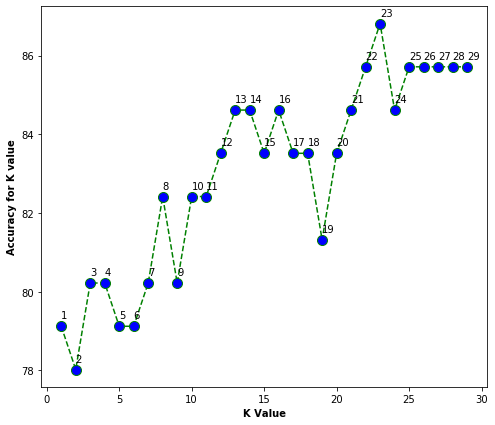

In [793]:
#Plot showing the Accuracy for the respective K Values

plt.figure(figsize=(8,7))
plt.plot(xdata,ydata,color = 'green',linestyle='dashed',marker='o',markerfacecolor='blue', markersize=10)
plt.xlabel("K Value",weight='bold')
plt.ylabel("Accuracy for K value",weight="bold")
for i in range(len(xdata)):
    plt.annotate(xdata[i], (xdata[i], ydata[i]+0.2))

### Random Forest Classifier:

In [794]:
from sklearn.ensemble import RandomForestClassifier
estimators=[10,20,100,500,1000]
RFaccuracy=[]
for e in estimators:
    regressor = RandomForestClassifier(n_estimators=e, random_state=0)
    regressor.fit(a_train, b_train)
    b_pred4 = regressor.predict(a_test)
    score4=regressor.score(a_test,b_test)*100
    RFaccuracy.append(score4)
    print(score4)
    
print("    ")
print("Best Accuracy: ","{:.2f}".format(max(RFaccuracy)),"%")
best=RFaccuracy.index(max(RFaccuracy))

#Cvalue which gives the best acccuracy is:

beste=estimators[best]
print("Value of C for Best Accuracy: ",beste)

75.82417582417582
72.52747252747253
76.92307692307693
76.92307692307693
76.92307692307693
    
Best Accuracy:  76.92 %
Value of C for Best Accuracy:  100


In [795]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(b_test,b_pred4))
print(accuracy_score(b_test, b_pred4))
print(classification_report(b_test,b_pred4))

[[40  7]
 [14 30]]
0.7692307692307693
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        47
           1       0.81      0.68      0.74        44

    accuracy                           0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



### Naive Bayes Classifier:

In [796]:
#Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(a_train, b_train)
b_pred5 = gnb.predict(a_test)
score5=gnb.score(a_test,b_test)*100
print(score5)

82.41758241758241


In [797]:
print(confusion_matrix(b_test,b_pred5))

[[42  5]
 [11 33]]


In [798]:
print(classification_report(b_test,b_pred5))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        47
           1       0.87      0.75      0.80        44

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



### Summarize all the classifiers and thier accuracy(13 attributes):

In [799]:
#summarize all the algorithms and find the best one

print("summarize all the algorithms and find the best one (for 13 attributes) :")
col={"Algorithm":["Logistic Regression","Support Vector Machine","Decision Tree","K Nearest Neighbour",
                           "Random Forest","Naive bayes"],"Accuracy":["{:.2f}".format(score),"{:.2f}".format(score1),"{:.2f}".format(score2),"{:.2f}".format(score3),
                 "{:.2f}".format(score4),"{:.2f}".format(score5)]}
dt1=pd.DataFrame(col,index=[1,2,3,4,5,6])
dt1

summarize all the algorithms and find the best one (for 13 attributes) :


,Algorithm,Accuracy
1,Logistic Regression,81.32
2,Support Vector Machine,81.32
3,Decision Tree,78.02
4,K Nearest Neighbour,86.81
5,Random Forest,76.92
6,Naive bayes,82.42


### Bar Plot for visualization of the effect of proper feature selection on accuracy score:

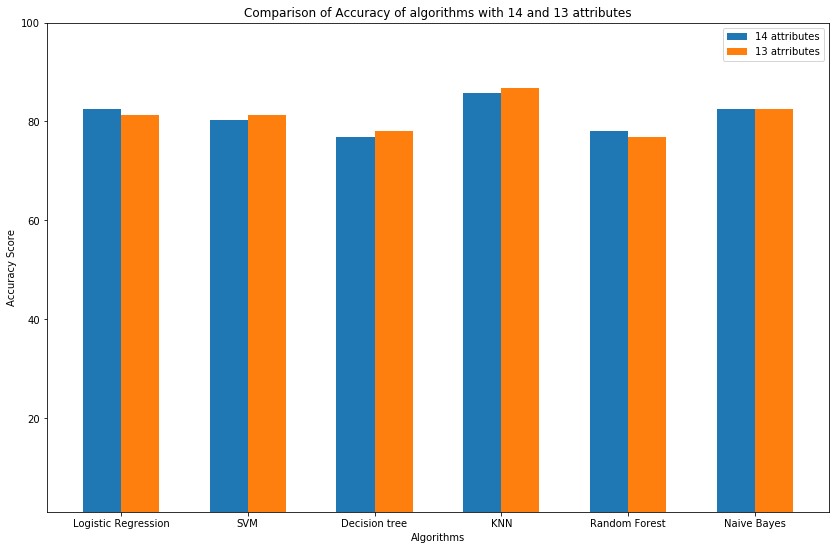

In [800]:
# Numbers of pairs of bars you want
N = 6

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (score_,score_1,score_2,score_3,score_4,score_5)
# Specify the values of orange bars (height)
orange_bar = (score,score1,score2,score3,score4,score5)

# Position of bars on x-axis
pos = np.arange(N)

# Figure size
plt.figure(figsize=(14,9))

# Width of a bar 
w = 0.3  

# Plotting
plt.bar(pos, blue_bar , w, label='14 attributes')
plt.bar(pos + w, orange_bar, w, label='13 atrributes')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy of algorithms with 14 and 13 attributes')

plt.xticks(pos + w / 2, ('Logistic Regression', 'SVM', 'Decision tree','KNN','Random Forest','Naive Bayes'))

# Finding the best position for legends and putting it
plt.legend()
plt.ylim(1,100)
plt.show()

### Comparision of accuracy score using 14 and 13 attributes respectively:

In [801]:
#summarize all the algorithms and find the best one

print("summarize all the algorithms and find the best one :")
col={"Algorithm":["Logistic Regression","Support Vector Machine","Decision Tree","K Nearest Neighbour",
                           "Random Forest","Naive bayes"],"Accuracy with 14 attributes":["{:.2f}".format(score_),"{:.2f}".format(score_1),"{:.2f}".format(score_2),"{:.2f}".format(score_3),
                 "{:.2f}".format(score_4),"{:.2f}".format(score_5)],"Accuracy with 13 attributes":["{:.2f}".format(score),"{:.2f}".format(score1),"{:.2f}".format(score2),"{:.2f}".format(score3),
                 "{:.2f}".format(score4),"{:.2f}".format(score5)]}
dt_=pd.DataFrame(col,index=[1,2,3,4,5,6])
dt_

summarize all the algorithms and find the best one :


,Algorithm,Accuracy with 14 attributes,Accuracy with 13 attributes
1,Logistic Regression,82.42,81.32
2,Support Vector Machine,80.22,81.32
3,Decision Tree,76.92,78.02
4,K Nearest Neighbour,85.71,86.81
5,Random Forest,78.02,76.92
6,Naive bayes,82.42,82.42


-----
### Trying 12 attributes to investigate any further improvement in accuracy score:
------

In [802]:
data3=data.drop(columns=['fbs','chol'])

In [803]:
data3

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,2,174,0,0.0,2,1.000000,3.0,1


In [804]:
g = data3.iloc[:, :-1].values # Independent Variables
h = data3.iloc[:, 11].values   # Dependent Variables

In [805]:
# Splitting the dataset into Training Set and Test set

from sklearn.model_selection import train_test_split
g_train,g_test,h_train,h_test = train_test_split(g,h,test_size=0.3,random_state=0)

In [806]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_g = StandardScaler()
g_train = sc_g.fit_transform(g_train)
g_test = sc_g.transform(g_test)

### Logistic Regression:

In [807]:
#LogisticRegression 

cval=[0.01,0.1,1,10,100]
Caccuracy=[]
from sklearn.linear_model import LogisticRegression
for c in cval:
    clf=LogisticRegression(C=c)
    clf.fit(g_train,h_train)
    
    #predicting Outcome
    h_pred=clf.predict(g_test) 

    #Calculating the score or accuracy of our model
    score__=clf.score(g_test,h_test)*100
    Caccuracy.append(score__)
    print("Accuracy: ","{:.2f}".format(score__),"%")
    
print("    ")
print("Best Accuracy: ","{:.2f}".format(max(Caccuracy)),"%")
best=Caccuracy.index(max(Caccuracy))

#Cvalue which gives the best acccuracy is:

bestC=cval[best]
print("Value of C for Best Accuracy: ",bestC)

Accuracy:  84.62 %
Accuracy:  84.62 %
Accuracy:  84.62 %
Accuracy:  84.62 %
Accuracy:  84.62 %
    
Best Accuracy:  84.62 %
Value of C for Best Accuracy:  0.01


In [808]:
#Confusion Matrix for viewing the correct and incorrect predictions of outcome made by the Model

matrix2= confusion_matrix(h_test,h_pred)
matrix2



array([[45,  2],
       [12, 32]])

In [809]:
print(classification_report(h_test,h_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        47
           1       0.94      0.73      0.82        44

    accuracy                           0.85        91
   macro avg       0.87      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91



### Support Vector Machine(SVM):

In [810]:
#Support Vector Machine(SVM)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',
                 random_state = 0)
classifier.fit(g_train, h_train)

#predict test set result
h_pred1 = classifier.predict(g_test)

#Accuracy Check

score1__=classifier.score(g_test,h_test)*100
print("Accuracy=", "{:.2f}".format(score1__),"%")

Accuracy= 83.52 %


In [811]:
#Confusion Matrix for viewing the correct and incorrect predictions of outcome made by the Model

matrix2= confusion_matrix(h_test, h_pred1)
matrix2

array([[45,  2],
       [13, 31]])

In [812]:
print(classification_report(h_test,h_pred1))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        47
           1       0.94      0.70      0.81        44

    accuracy                           0.84        91
   macro avg       0.86      0.83      0.83        91
weighted avg       0.85      0.84      0.83        91



### Decision Tree classifier:

In [813]:
#Finding best Max Depth Value for best accuracy

Treeaccuracy=[]
from sklearn.tree import DecisionTreeClassifier
for m in range(1,20):
    tree = DecisionTreeClassifier(max_depth=m, random_state=0)
    tree.fit(g_train, h_train)
    
    #Prediction
    h_pred2=tree.predict(g_test)
    
    #Accuracy check
    score2__=tree.score(g_test, h_test)*100
    
    print("Accuracy: ","{:.2f}".format(score2__),"%")
    Treeaccuracy.append(score2__)
    
    
print("      ")
print("Best Accuracy is: ","{:.2f}".format(max(Treeaccuracy)),"%")
bestm=Treeaccuracy.index(max(Treeaccuracy))+1
print("Max depth for best accuracy is: ",bestm)

Accuracy:  76.92 %
Accuracy:  65.93 %
Accuracy:  75.82 %
Accuracy:  76.92 %
Accuracy:  75.82 %
Accuracy:  72.53 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
Accuracy:  73.63 %
      
Best Accuracy is:  76.92 %
Max depth for best accuracy is:  1


In [814]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=bestm,random_state=0)
tree.fit(g_train, h_train)
h_pred2=tree.predict(g_test)
score2__=tree.score(g_test, h_test)*100
print("Default Max Depth Accuracy on test set: ","{:.2f}".format(score2__),"%")
print(classification_report(h_test,h_pred2))

Default Max Depth Accuracy on test set:  76.92 %
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        47
           1       0.85      0.64      0.73        44

    accuracy                           0.77        91
   macro avg       0.79      0.76      0.76        91
weighted avg       0.78      0.77      0.76        91



### K Nearest Neighbour classifier:

In [815]:
#K Nearest Neighbour

import math
from sklearn.neighbors import KNeighborsClassifier
KNNaccuracy=[]
for k in range(1,30): 
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(g_train, h_train)
    h_pred3=neigh.predict(g_test)
    score3__=neigh.score(g_test,h_test)*100
    print("Accuracy=", "{:.2f}".format(score3__),"%")
    KNNaccuracy.append(score3__)
    
#score or accuracy of our model
print("        ")
print("Max Accuracy:","{:.2f}".format(max(KNNaccuracy)),"%")
print("K Value for max Accuracy:",KNNaccuracy.index(max(KNNaccuracy))+1)

bestK=KNNaccuracy.index(max(KNNaccuracy))+1

Accuracy= 76.92 %
Accuracy= 76.92 %
Accuracy= 79.12 %
Accuracy= 79.12 %
Accuracy= 81.32 %
Accuracy= 80.22 %
Accuracy= 80.22 %
Accuracy= 81.32 %
Accuracy= 79.12 %
Accuracy= 82.42 %
Accuracy= 82.42 %
Accuracy= 83.52 %
Accuracy= 83.52 %
Accuracy= 83.52 %
Accuracy= 83.52 %
Accuracy= 83.52 %
Accuracy= 81.32 %
Accuracy= 81.32 %
Accuracy= 80.22 %
Accuracy= 81.32 %
Accuracy= 83.52 %
Accuracy= 83.52 %
Accuracy= 83.52 %
Accuracy= 84.62 %
Accuracy= 83.52 %
Accuracy= 85.71 %
Accuracy= 85.71 %
Accuracy= 85.71 %
Accuracy= 85.71 %
        
Max Accuracy: 85.71 %
K Value for max Accuracy: 26


In [816]:
neigh = KNeighborsClassifier(n_neighbors=bestK)
neigh.fit(g_train, h_train)
h_pred3=neigh.predict(g_test)
score3__=neigh.score(g_test,h_test)*100
print("Accuracy=", "{:.2f}".format(score3__),"%")
matrix1=confusion_matrix(h_test, h_pred3)
matrix1

Accuracy= 85.71 %


array([[46,  1],
       [12, 32]])

In [817]:
print(classification_report(b_test,b_pred3))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88        47
           1       0.97      0.75      0.85        44

    accuracy                           0.87        91
   macro avg       0.89      0.86      0.87        91
weighted avg       0.89      0.87      0.87        91



### Random Forest Classifier:

In [818]:
#RF
from sklearn.ensemble import RandomForestClassifier
estimators=[10,20,100,500,1000]
RFaccuracy=[]
for e in estimators:
    regressor = RandomForestClassifier(n_estimators=e, random_state=0)
    regressor.fit(g_train, h_train)
    h_pred4 = regressor.predict(g_test)
    score4__=regressor.score(g_test,h_test)*100
    RFaccuracy.append(score4__)
    print(score4__)
    
print("    ")
print("Best Accuracy: ","{:.2f}".format(max(RFaccuracy)),"%")
best=RFaccuracy.index(max(RFaccuracy))

#evalue which gives the best acccuracy is:

beste=estimators[best]
print("Value of e for Best Accuracy: ",beste)

74.72527472527473
79.12087912087912
78.02197802197803
78.02197802197803
79.12087912087912
    
Best Accuracy:  79.12 %
Value of e for Best Accuracy:  20


In [819]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(h_test,h_pred4))
print(accuracy_score(h_test, h_pred4))
print(classification_report(h_test,h_pred4))

[[42  5]
 [14 30]]
0.7912087912087912
              precision    recall  f1-score   support

           0       0.75      0.89      0.82        47
           1       0.86      0.68      0.76        44

    accuracy                           0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



### Naive Bayes Classifier:

In [820]:
#Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(g_train, h_train)
h_pred5 = gnb.predict(g_test)
score5__=gnb.score(g_test,h_test)*100
print(score5__)


84.61538461538461


In [821]:
print(confusion_matrix(h_test,h_pred5))

print(classification_report(h_test,h_pred5))

[[44  3]
 [11 33]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        47
           1       0.92      0.75      0.83        44

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91



### Summarize the accuracy obtained using 12 attributes:

In [822]:
#summarize all the algorithms and find the best one

print("summarize all the algorithms and find the best one (for 12 attributes) :")
col={"Algorithm":["Logistic Regression","Support Vector Machine","Decision Tree","K Nearest Neighbour",
                           "Random Forest","Naive bayes"],"Accuracy":["{:.2f}".format(score__),"{:.2f}".format(score1__),"{:.2f}".format(score2__),"{:.2f}".format(score3__),
                 "{:.2f}".format(score4__),"{:.2f}".format(score5__)]}
dt2=pd.DataFrame(col,index=[1,2,3,4,5,6])
dt2

summarize all the algorithms and find the best one (for 12 attributes) :


,Algorithm,Accuracy
1,Logistic Regression,84.62
2,Support Vector Machine,83.52
3,Decision Tree,76.92
4,K Nearest Neighbour,85.71
5,Random Forest,79.12
6,Naive bayes,84.62


### Comparing the accuracy scores of classifiers using 14,13 and 12 atrributes:

In [823]:
#summarize all the algorithms and find the best one

print("summarize all the algorithms and find the best one:")
col={"Algorithm":["Logistic Regression","Support Vector Machine","Decision Tree","K Nearest Neighbour",
                           "Random Forest","Naive bayes"],"Accuracy with 14 attributes":["{:.2f}".format(score_),"{:.2f}".format(score_1),"{:.2f}".format(score_2),"{:.2f}".format(score_3),
                 "{:.2f}".format(score_4),"{:.2f}".format(score_5)],"Accuracy with 13 attributes":["{:.2f}".format(score),"{:.2f}".format(score1),"{:.2f}".format(score2),"{:.2f}".format(score3),
                 "{:.2f}".format(score4),"{:.2f}".format(score5)],"Accuracy with 12 attributes":["{:.2f}".format(score__),"{:.2f}".format(score1__),"{:.2f}".format(score2__),"{:.2f}".format(score3__),
                 "{:.2f}".format(score4__),"{:.2f}".format(score5__)]}
dt_=pd.DataFrame(col,index=[1,2,3,4,5,6])
dt_

summarize all the algorithms and find the best one:


,Algorithm,Accuracy with 14 attributes,Accuracy with 13 attributes,Accuracy with 12 attributes
1,Logistic Regression,82.42,81.32,84.62
2,Support Vector Machine,80.22,81.32,83.52
3,Decision Tree,76.92,78.02,76.92
4,K Nearest Neighbour,85.71,86.81,85.71
5,Random Forest,78.02,76.92,79.12
6,Naive bayes,82.42,82.42,84.62


### Bar Plot for visualization of the effect of proper feature selection on accuracy score:

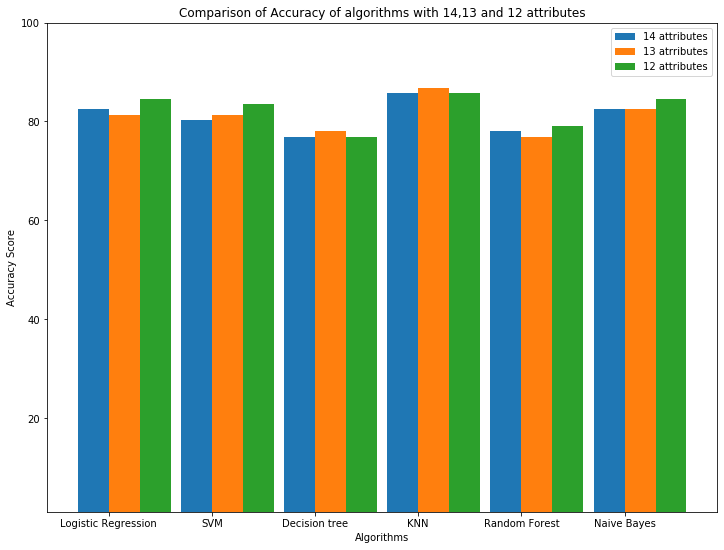

In [824]:
# Numbers of pairs of bars you want
N = 6

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (score_,score_1,score_2,score_3,score_4,score_5)
# Specify the values of orange bars (height)
orange_bar = (score,score1,score2,score3,score4,score5)
# Specify the values of  green bars (height)
green_bar=(score__,score1__,score2__,score3__,score4__,score5__)

# Position of bars on x-axis
pos = np.arange(N)

# Figure size
plt.figure(figsize=(12,9))

# Width of a bar 
w = 0.3  

# Plotting
plt.bar(pos, blue_bar , w, label='14 attributes')
plt.bar(pos + w, orange_bar, w, label='13 atrributes')
plt.bar(pos + w + w, green_bar,w, label='12 attributes')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy of algorithms with 14,13 and 12 attributes')

plt.xticks(pos + w / 2, ('Logistic Regression', 'SVM', 'Decision tree','KNN','Random Forest','Naive Bayes'))

# Finding the best position for legends and putting it
plt.legend()
plt.ylim(1,100)
plt.show()

## Finally the best Model made into use:

In [825]:
bestmodel_data=data.drop(columns=['fbs'])

In [826]:
bestmodel_a = bestmodel_data.iloc[:, :-1].values # Independent Variables
bestmodel_b = bestmodel_data.iloc[:, 12].values   # Dependent Variable

In [827]:
# Splitting the dataset into Training Set and Test set

from sklearn.model_selection import train_test_split
bestmodel_a_train,bestmodel_a_test,bestmodel_b_train,bestmodel_b_test = train_test_split(bestmodel_a,bestmodel_b,test_size=0.3,random_state=0)

In [828]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_bestmodel_a = StandardScaler()
bestmodel_a_train = sc_bestmodel_a.fit_transform(bestmodel_a_train)
bestmodel_a_test = sc_bestmodel_a.transform(bestmodel_a_test)


### Using 13 attributes and applying K Nearest Neighbor with K Value=23:

In [829]:
from sklearn.neighbors import KNeighborsClassifier

bestneigh = KNeighborsClassifier(n_neighbors=23)
bestneigh.fit(bestmodel_a_train, bestmodel_b_train)
bestmodel_b_pred=bestneigh.predict(bestmodel_a_test)
bestscore=bestneigh.score(bestmodel_a_test,bestmodel_b_test)*100

print("Accuracy=", "{:.2f}".format(bestscore),"%")

bestmatrix=confusion_matrix(bestmodel_b_test, bestmodel_b_pred)
bestmatrix

Accuracy= 86.81 %


array([[46,  1],
       [11, 33]])

### Thank You !!